In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt




from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder



In [2]:
#reading data from train.csv in dataset folder 
def read_data(file_path):    
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except Exception as e:
        print(f"Error reading file: {str(e)}")
        return None

In [3]:
# Read the training data
train_data = read_data('/kaggle/input/machine-learning-dataset/train.csv')
if train_data is not None:
    print("Data loaded successfully!")

Data loaded successfully!


In [39]:
def preprocess_data():
    train_data = read_data('/kaggle/input/machine-learning-dataset/train.csv')
    if train_data is not None:
        print("Data loaded successfully!")
    # Handle categorical variables
    categorical_columns = ['Gender', 'City', 'Working Professional or Student', 
                          'Profession', 'Sleep Duration', 'Dietary Habits', 
                          'Degree', 'Have you ever had suicidal thoughts ?',
                          'Family History of Mental Illness']
    label_encoders = {}
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        train_data[column] = label_encoders[column].fit_transform(train_data[column].fillna('Missing'))
    numerical_columns = ['Age', 'Academic Pressure', 'Work Pressure',
                    'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
                    'Financial Stress']
    for column in numerical_columns:
        train_data[column] = train_data[column].fillna(train_data[column].median())
    X = train_data.drop(['id', 'Name', 'Depression','CGPA'], axis=1)
    y = train_data['Depression']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


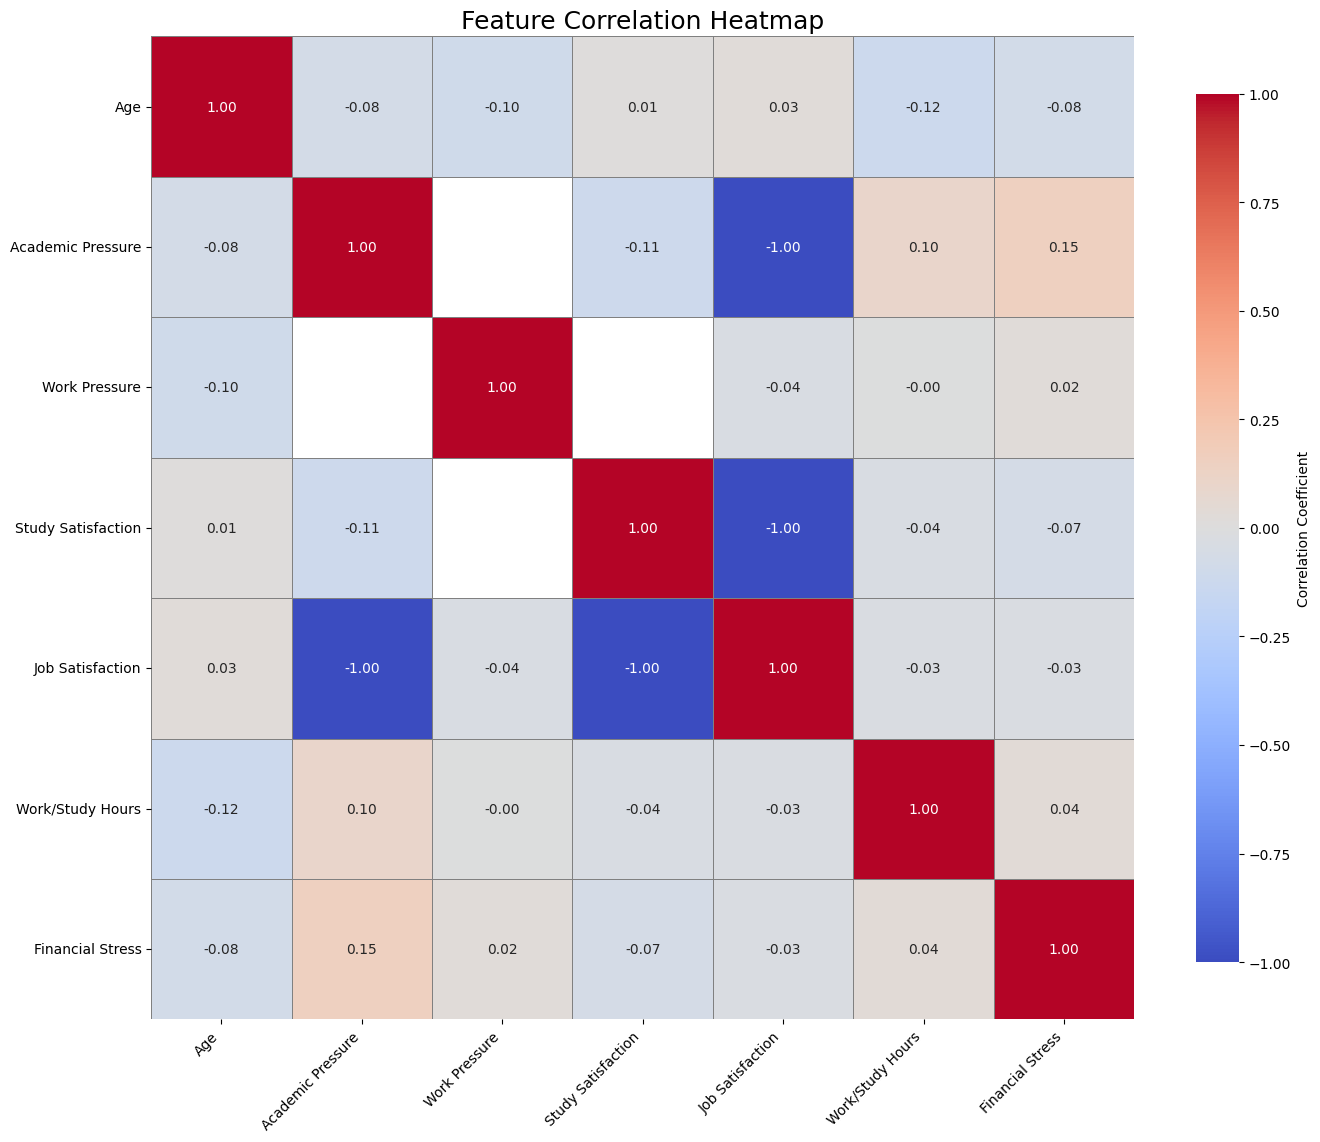

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(data, figsize=(14, 12), cmap="coolwarm"):
    # Compute the correlation matrix
    corr = data.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=figsize)

    # Create heatmap with annotations
    sns.heatmap(
        corr,
        annot=True,         # Show the correlation values
        fmt=".2f",           # Format to 2 decimal places
        cmap=cmap,
        square=True,
        linewidths=0.5,
        linecolor='gray',
        cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
    )

    # Title and axis formatting
    plt.title('Feature Correlation Heatmap', fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

# Step 1: Get numerical features
numerical_features = train_data.select_dtypes(include=['number']).columns.tolist()

# Step 2: Remove target and ID columns from the list
numerical_features = [col for col in numerical_features if col not in ['id', 'Depression','CGPA']]

# Step 3: Extract only numerical data
numerical_data = train_data[numerical_features]

# Step 4: Plot correlation heatmap
plot_correlation_heatmap(numerical_data)


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

def preprocess_data():
    # Load data
    train_data = read_data('/kaggle/input/machine-learning-dataset/train.csv')
    if train_data is None:
        raise ValueError("Failed to load data")
    print("Data loaded successfully!")
    
    # Original columns
    categorical_columns = ['Gender', 'City', 'Working Professional or Student', 
                         'Profession', 'Sleep Duration', 'Dietary Habits', 
                         'Degree', 'Have you ever had suicidal thoughts ?',
                         'Family History of Mental Illness']
    
    numerical_columns = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                        'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
                        'Financial Stress']
    
    # FEATURE ENGINEERING
    # 1. Create combined stress score (then remove individual stress components)
    # train_data['Total_Stress'] = train_data['Academic Pressure'] + train_data['Work Pressure'] + train_data['Financial Stress']
    # numerical_columns.remove('Academic Pressure')
    # numerical_columns.remove('Work Pressure')
    # numerical_columns.remove('Financial Stress')

    # Trial of adding new col
    train_data['Total_Sat']=train_data['Study Satisfaction']+train_data['Job Satisfaction']
    numerical_columns.remove('Study Satisfaction')
    numerical_columns.remove('Job Satisfaction')
    
    
    # # 4. Age bins (then remove original Age column)
    # train_data['Age_Group'] = pd.cut(train_data['Age'], 
    #                                bins=[0, 20, 25, 30, 40, 100],
    #                                labels=['Teen', 'Young Adult', 'Adult', 'Mid Age', 'Senior'])
    # numerical_columns.remove('Age')
    
    # # Update categorical columns with new features
    # categorical_columns.extend(['Age_Group'])
    
    # # Update numerical columns with new features
    # numerical_columns.extend(['Total_Stress'])
    
    # # Columns to drop (including original features we've replaced)
    cols_to_drop = ['id', 'Name', 'Depression', 'Study Satisfaction', 'Job Satisfaction']
    
    # Preprocessing pipelines
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])
    
    # Split data
    X = train_data.drop(cols_to_drop, axis=1, errors='ignore')  # errors='ignore' in case some cols already removed
    y = train_data['Depression']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, preprocessor

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

def train_with_adaboost():
    # Get preprocessed data
    X_train, X_test, y_train, y_test, preprocessor = preprocess_data()
    
    # Create a pipeline with preprocessing and AdaBoost
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('adaboost', AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=200,
            learning_rate=1.0,
            random_state=42
        ))
    ])
    
    # Train the model
    print("Training AdaBoost model...")
    model.fit(X_train, y_train)
    
    # Evaluate on training set
    train_pred = model.predict(X_train)
    print("\nTraining Performance:")
    print(classification_report(y_train, train_pred))
    print(f"Training Accuracy: {accuracy_score(y_train, train_pred):.4f}")
    
    # Evaluate on test set
    test_pred = model.predict(X_test)
    print("\nTest Performance:")
    print(classification_report(y_test, test_pred))
    print(f"Test Accuracy: {accuracy_score(y_test, test_pred):.4f}")
    
    # Cross-validation
    print("\nRunning cross-validation...")
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV accuracy: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")
    
    return model

# Run the training
adaboost_model = train_with_adaboost()

Data loaded successfully!
Training AdaBoost model...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Training Performance:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     92147
           1       0.84      0.80      0.82     20413

    accuracy                           0.94    112560
   macro avg       0.90      0.88      0.89    112560
weighted avg       0.94      0.94      0.94    112560

Training Accuracy: 0.9361

Test Performance:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22986
           1       0.83      0.81      0.82      5154

    accuracy                           0.93     28140
   macro avg       0.89      0.88      0.89     28140
weighted avg       0.93      0.93      0.93     28140

Test Accuracy: 0.9348

Running cross-validation...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Cross-validation scores: [0.93412402 0.93816631 0.93527896 0.93590085 0.93474591]
Mean CV accuracy: 0.9356 (±0.0014)
